# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Experiments of Chapter 3


[MINDS - Machine Intelligence and Data Science Lab ](http://www.minds.eng.ufmg.br/)

[Post Graduate Program in Electrical Engineering - PPGEE]()

[Federal University of Minas Gerais - UFMG]()

* **Author**: Petrônio Cândido de  Lima e Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SILVA, P.C.L)
* **Advisor**: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (GUIMARÃES, F. G)
* **Co-Advisor**: Hossein Javedani Sadaei  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-0848-9280" href="https://orcid.org/0000-0002-0848-9280" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SADAEI, H. J.)

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>


## Library Installation

In [0]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
!pip install pyflux
!git clone https://github.com/petroniocandido/stac

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-f2u4i6rl
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-f2u4i6rl
  Stored in directory: /tmp/pip-ephem-wheel-cache-2axjxiyr/wheels/e7/32/a9/230470113df5a73242a5a6d05671cb646db97abf14bbce2644
Successfully built pyFTS
     |████████████████████████████████| 1.3MB 2.8MB/s 
     |████████████████████████████████| 962kB 35.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux
Cloning into 'stac'...
remote: Enumerating objects: 2238, done.
remote: Total 2238 (delta 0), reused 0 (delta 0), pack-reused 2238
Receiving objects: 100% (2238/2238), 23.62 MiB | 31.58 MiB/s, done.
Resolving deltas: 100% (1147/1147), done.


## Common Imports

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
from pyFTS.models.ensemble import ensemble
from pyFTS.models import hofts
from pyFTS.benchmarks import benchmarks, Util as bUtil, arima, quantreg, BSTS, knn
from pyFTS.common import Util

ModuleNotFoundError: ignored

## Experiments database import

In [0]:
!wget -O experiments.db.gz https://www.dropbox.com/s/z45fq0bqdrtptu1/experiments.db.gz?dl=1
!gunzip experiments.db.gz

## Datasets

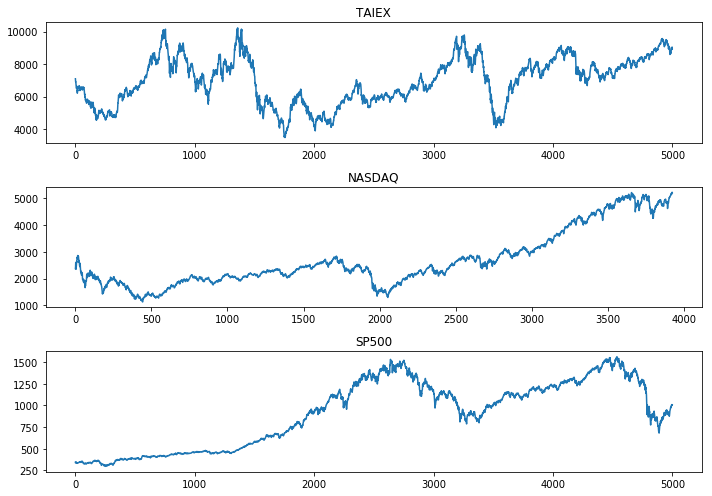

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500

datasets = {}

datasets['TAIEX'] = TAIEX.get_data()[:5000]
datasets['NASDAQ'] = NASDAQ.get_data()[:5000]
datasets['SP500'] = SP500.get_data()[10000:15000]

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[10,7])

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
  ax[ct].plot(dataset)
  ax[ct].set_title(dataset_name)

plt.tight_layout()


## Grid Search

### IFTS & WIFTS

In [0]:
for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[ifts.IntervalFTS, ifts.WeightedIntervalFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 80, 5),
                                    progress=False, type='interval',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


#### IFTS Analysis

In [0]:
from pyFTS.benchmarks import Util as bUtil

wk05 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='IFTS' and measure = 'winkler05'")
wk25 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='IFTS' and measure = 'winkler25'")

wk05['Partitions'] = [int.from_bytes(k, "little") for k in wk05['Partitions'].values]
wk25['Partitions'] = [int.from_bytes(k, "little") for k in wk25['Partitions'].values]

wk05.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,9,2019-05-31 18:53:11,TAIEX,gridsearch,interval,IFTS,,1,Grid,10,10,1,None,winkler05,4237.04
1,19,2019-05-31 18:53:11,TAIEX,gridsearch,interval,IFTS,,1,Grid,15,14,1,None,winkler05,2833.20
2,29,2019-05-31 18:53:11,TAIEX,gridsearch,interval,IFTS,,1,Grid,20,18,1,None,winkler05,2202.11
3,39,2019-05-31 18:53:11,TAIEX,gridsearch,interval,IFTS,,1,Grid,25,22,1,None,winkler05,1744.20
4,49,2019-05-31 18:53:11,TAIEX,gridsearch,interval,IFTS,,1,Grid,30,26,1,None,winkler05,1469.91


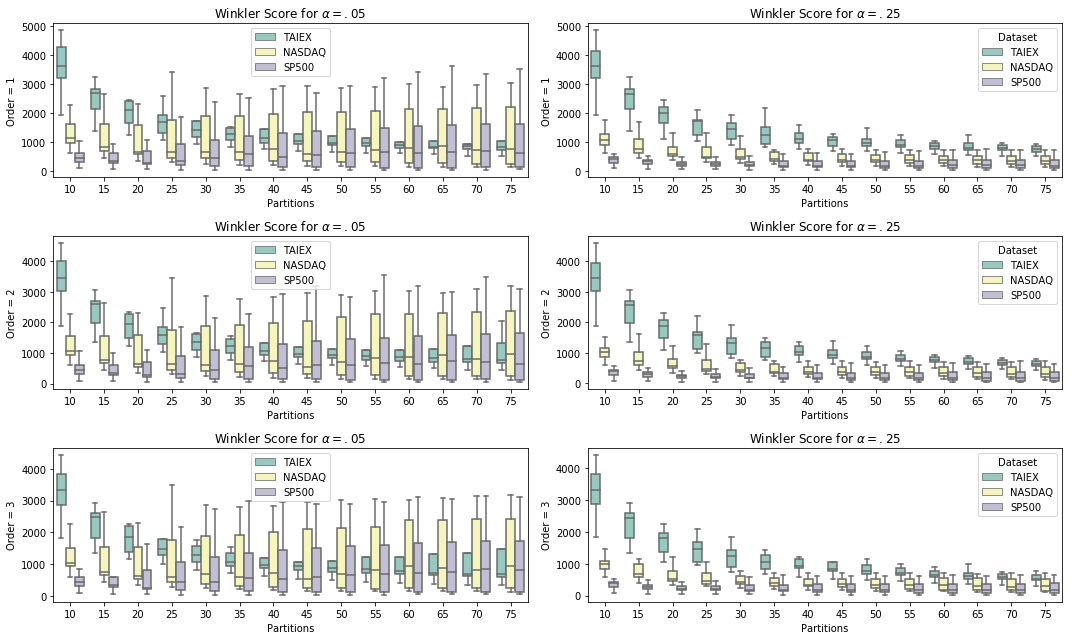

In [0]:
import seaborn as sns

orders = wk05['Order'].unique()

fig, ax = plt.subplots(nrows=len(orders), ncols=2, figsize=[15,3*len(orders)])

for co, order in enumerate(orders):
  
  df = wk05[(wk05['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][0], 
                   palette="Set3")
  g1.legend(handles=None)
  ax[co][0].set_title("Winkler Score for $\\alpha=.05$")
  ax[co][0].set_ylabel("Order = {}".format(order))
  ax[co][0].set_xlabel("Partitions")
  
  df = wk25[(wk25['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][1], 
                   palette="Set3")
  #box = g1.get_position()
  #g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
  #g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
  ax[co][1].set_title("Winkler Score for $\\alpha=.25$")
  ax[co][1].set_ylabel("Order = {}".format(order))
  ax[co][1].set_xlabel("Partitions")

plt.tight_layout()

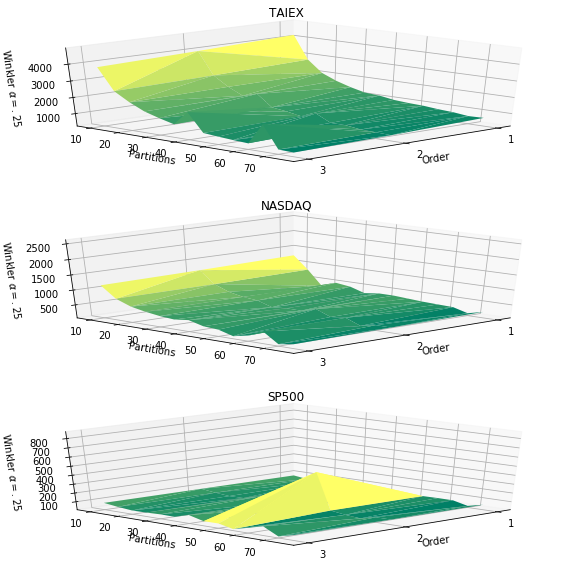

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

fig = plt.figure(figsize=[10,10])

nplots = len(datasets.keys())

for ct, dataset in enumerate(datasets.keys()):

  df = bUtil.get_dataframe_from_bd("experiments.db","tag = 'gridsearch' " 
                                    +" and dataset = '{}' and Model='IFTS' and measure = 'winkler25'".format(dataset))

  df['Partitions'] = [int.from_bytes(k, "little") for k in df['Partitions'].values]

  #df['Value'] = min_max_scaler.fit_transform([[k] for k in df['Value'].values]).flatten()


  ax = fig.add_subplot(nplots, 1, ct+1, projection='3d')
  ax.plot_trisurf(df['Order'].values, df['Partitions'].values, df['Value'].values, cmap="summer", linewidth=0.2, antialiased=True)
  ax.view_init(30,45)
  ax.set_title(dataset) #"Error surface by order and number of partitions")
  ax.set_xlabel("Order")
  ax.set_xticks([1,2,3])
  ax.set_ylabel("Partitions")
  ax.set_zlabel("Winkler $\\alpha=.25$")
#ax.set_zlim([0,1])
#plt.tight_layout()
plt.show()


#### WIFTS Anaysis

In [0]:
from pyFTS.benchmarks import Util as bUtil

wk05 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='WIFTS' and measure = 'winkler05'")
wk25 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='WIFTS' and measure = 'winkler25'")

wk05['Partitions'] = [int.from_bytes(k, "little") for k in wk05['Partitions'].values]
wk25['Partitions'] = [int.from_bytes(k, "little") for k in wk25['Partitions'].values]

wk05.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,429,2019-05-31 18:53:28,TAIEX,gridsearch,interval,WIFTS,,1,Grid,10,10,1,None,winkler05,1416.71
1,439,2019-05-31 18:53:28,TAIEX,gridsearch,interval,WIFTS,,1,Grid,15,14,1,None,winkler05,964.27
2,449,2019-05-31 18:53:28,TAIEX,gridsearch,interval,WIFTS,,1,Grid,20,18,1,None,winkler05,740.93
3,459,2019-05-31 18:53:28,TAIEX,gridsearch,interval,WIFTS,,1,Grid,25,22,1,None,winkler05,637.93
4,469,2019-05-31 18:53:28,TAIEX,gridsearch,interval,WIFTS,,1,Grid,30,26,1,None,winkler05,563.92


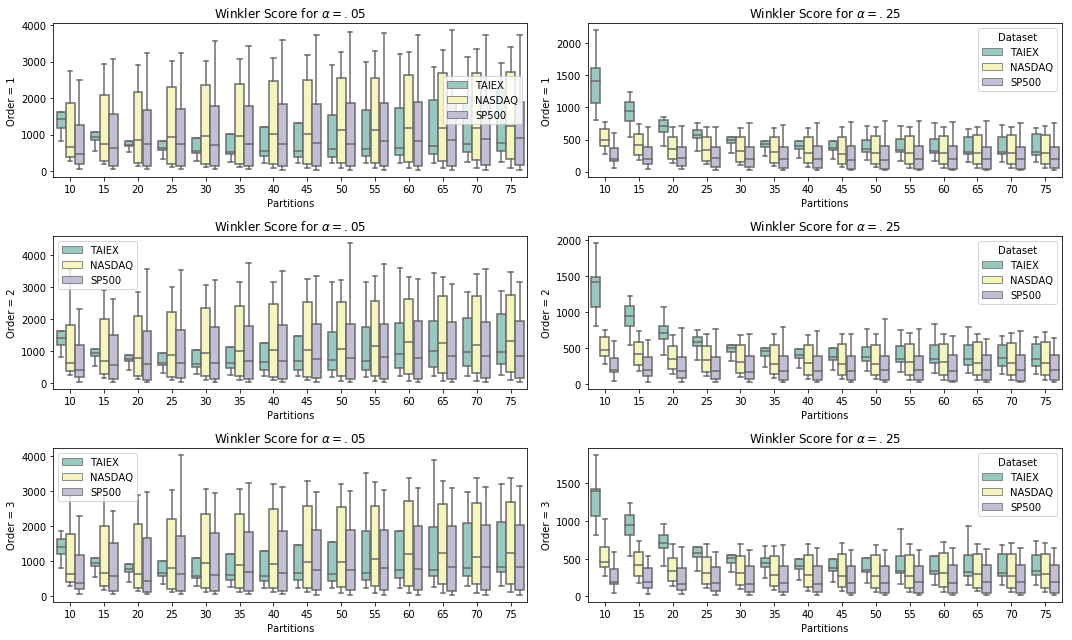

In [0]:
import seaborn as sns

orders = wk05['Order'].unique()

fig, ax = plt.subplots(nrows=len(orders), ncols=2, figsize=[15,3*len(orders)])

for co, order in enumerate(orders):
  
  df = wk05[(wk05['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][0], 
                   palette="Set3")
  g1.legend(loc='left')
  ax[co][0].set_title("Winkler Score for $\\alpha=.05$")
  ax[co][0].set_ylabel("Order = {}".format(order))
  ax[co][0].set_xlabel("Partitions")
  
  df = wk25[(wk25['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][1], 
                   palette="Set3")
  #box = g1.get_position()
  #g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
  #g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
  ax[co][1].set_title("Winkler Score for $\\alpha=.25$")
  ax[co][1].set_ylabel("Order = {}".format(order))
  ax[co][1].set_xlabel("Partitions")

plt.tight_layout()

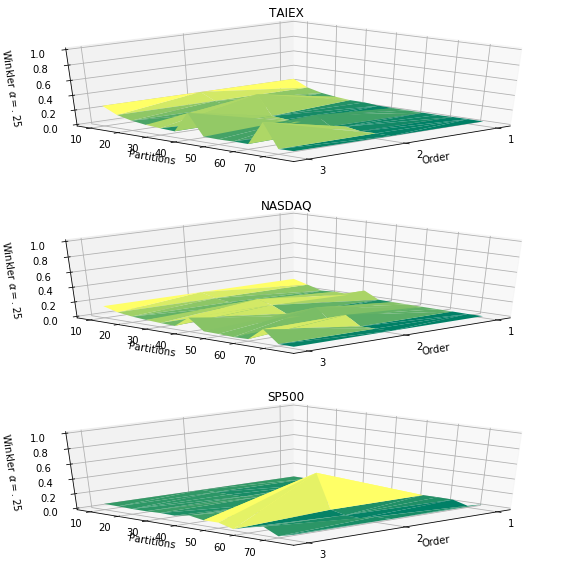

In [0]:
from sklearn import preprocessing

fig = plt.figure(figsize=[10,10])

nplots = len(datasets.keys())

for ct, dataset in enumerate(datasets.keys()):

  df = bUtil.get_dataframe_from_bd("experiments.db","tag = 'gridsearch' " 
                                    +" and dataset = '{}' and Model='WIFTS' and measure = 'winkler25'".format(dataset))

  df['Partitions'] = [int.from_bytes(k, "little") for k in df['Partitions'].values]
  
  min_max_scaler = preprocessing.MinMaxScaler()

  df['Value'] = min_max_scaler.fit_transform([[k] for k in df['Value'].values]).flatten()


  ax = fig.add_subplot(nplots, 1, ct+1, projection='3d')
  ax.plot_trisurf(df['Order'].values, df['Partitions'].values, df['Value'].values, cmap="summer", linewidth=0.2, antialiased=True)
  ax.view_init(30,45)
  ax.set_title(dataset) #"Error surface by order and number of partitions")
  ax.set_xlabel("Order")
  ax.set_xticks([1,2,3])
  ax.set_ylabel("Partitions")
  ax.set_zlabel("Winkler $\\alpha=.25$")
#ax.set_zlim([0,1])
#plt.tight_layout()
plt.show()


### EnsembleFTS

#### Interval

In [0]:
methods = [ensemble.SimpleEnsembleFTS]*8

methods_parameters = [
    {'name': 'EnsembleFTS-HOFTS-10-.05', 'fts_method': hofts.HighOrderFTS, 'partitions': np.arange(20,50,10), 'alpha': .05},
    {'name': 'EnsembleFTS-HOFTS-5-.05', 'fts_method': hofts.HighOrderFTS, 'partitions': np.arange(20,50,5), 'alpha': .05},
    {'name': 'EnsembleFTS-HOFTS-10-.25', 'fts_method': hofts.HighOrderFTS, 'partitions': np.arange(20,50,10), 'alpha': .25},
    {'name': 'EnsembleFTS-HOFTS-5-.25', 'fts_method': hofts.HighOrderFTS, 'partitions': np.arange(20,50,5), 'alpha': .25},
    {'name': 'EnsembleFTS-WHOFTS-10-.05', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,10), 'alpha': .05},
    {'name': 'EnsembleFTS-WHOFTS-5-.05', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5), 'alpha': .05},
    {'name': 'EnsembleFTS-WHOFTS-10-.25', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,10), 'alpha': .25},
    {'name': 'EnsembleFTS-WHOFTS-5-.25', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5), 'alpha': .25},
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=methods,
                                    methods_parameters=methods_parameters,
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[3],
                                    partitions=[None],
                                    type='interval',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name, tag="gridsearch")

In [0]:
wk05 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model like 'EnsembleFTS%-.05' and measure = 'winkler05'")
wk25 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model like 'EnsembleFTS%-.25' and measure = 'winkler25'")


wk05.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,48729,2019-05-31 22:03:09,TAIEX,gridsearch,interval,EnsembleFTS-HOFTS-10-.05,,3,,None,0,1,None,winkler05,1654.45
1,48739,2019-05-31 22:03:19,TAIEX,gridsearch,interval,EnsembleFTS-HOFTS-5-.05,,3,,None,0,1,None,winkler05,1123.56
2,48769,2019-05-31 22:03:28,TAIEX,gridsearch,interval,EnsembleFTS-WHOFTS-10-.05,,3,,None,0,1,None,winkler05,1405.74
3,48779,2019-05-31 22:03:28,TAIEX,gridsearch,interval,EnsembleFTS-WHOFTS-5-.05,,3,,None,0,1,None,winkler05,1064.49
4,48809,2019-05-31 22:03:28,TAIEX,gridsearch,interval,EnsembleFTS-HOFTS-10-.05,,3,,None,0,1,None,winkler05,1299.28


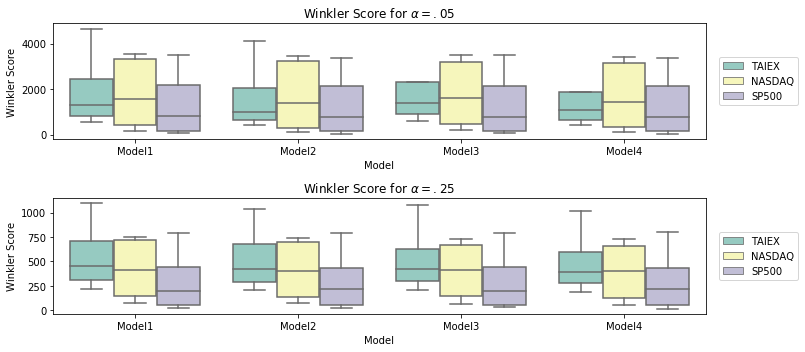

In [0]:

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10,5])

g1 = sns.boxplot(x='Model', y='Value', hue='Dataset', data=wk05, showfliers=False, ax=ax[0], 
                 palette="Set3")
box = g1.get_position()
g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
ax[0].set_title("Winkler Score for $\\alpha=.05$")
ax[0].set_ylabel("Winkler Score")
#ax[0].set_xlabel("Model")
ax[0].set_xticklabels(['Model1','Model2','Model3','Model4'])

g1 = sns.boxplot(x='Model', y='Value', hue='Dataset', data=wk25, showfliers=False, ax=ax[1], 
                 palette="Set3")
box = g1.get_position()
g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
ax[1].set_title("Winkler Score for $\\alpha=.25$")
ax[1].set_ylabel("Winkler Score")
#ax[1].set_xlabel("Model")
ax[1].set_xticklabels(['Model1','Model2','Model3','Model4'])

plt.tight_layout()

#### Probabilistic

In [0]:
methods = [ensemble.SimpleEnsembleFTS]*4

methods_parameters = [
    {'name': 'EnsembleFTS-HOFTS-10', 'fts_method': hofts.HighOrderFTS, 'partitions': np.arange(20,50,10)},
    {'name': 'EnsembleFTS-HOFTS-5', 'fts_method': hofts.HighOrderFTS, 'partitions': np.arange(20,50,5)},
    {'name': 'EnsembleFTS-WHOFTS-10', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,10)},
    {'name': 'EnsembleFTS-WHOFTS-5', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=methods,
                                    methods_parameters=methods_parameters,
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[3],
                                    partitions=[None],
                                    type='distribution',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name, tag="gridsearch")

In [0]:
from pyFTS.benchmarks import Util as bUtil

crps = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model like 'EnsembleFTS%' and measure = 'crps'")

crps.head()


,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,53361,2019-05-31 23:02:24,TAIEX,gridsearch,density,EnsembleFTS-HOFTS-10,,3,,None,0,1,None,crps,4.317
1,53364,2019-05-31 23:02:44,TAIEX,gridsearch,density,EnsembleFTS-HOFTS-5,,3,,None,0,1,None,crps,3.398
2,53367,2019-05-31 23:02:44,TAIEX,gridsearch,density,EnsembleFTS-WHOFTS-10,,3,,None,0,1,None,crps,5.038
3,53370,2019-05-31 23:02:44,TAIEX,gridsearch,density,EnsembleFTS-WHOFTS-5,,3,,None,0,1,None,crps,4.035
4,53373,2019-05-31 23:02:44,TAIEX,gridsearch,density,EnsembleFTS-HOFTS-10,,3,,None,0,1,None,crps,6.761


[Text(0, 0, 'Model1'),
 Text(0, 0, 'Model2'),
 Text(0, 0, 'Model3'),
 Text(0, 0, 'Model4')]

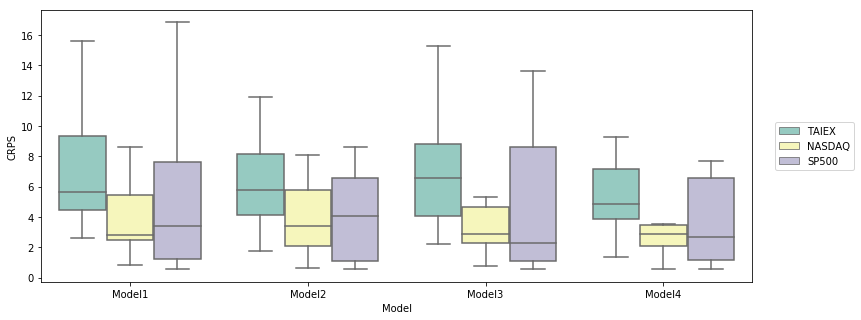

In [0]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

g1 = sns.boxplot(x='Model', y='Value', hue='Dataset', data=crps, showfliers=False, ax=ax, 
                 palette="Set3")
box = g1.get_position()
g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
ax.set_ylabel("CRPS")
#ax.set_xlabel("Model")
ax.set_xticklabels(['Model1','Model2','Model3','Model4'])

## Experiments

### Interval

#### Batch experiment execution

In [0]:
from pyFTS.benchmarks import arima, quantreg, BSTS, knn
from pyFTS.models import ifts, hofts
from pyFTS.ensemble import ensemble

competitor_methods = [
    [arima.ARIMA]*6,
    [quantreg.QuantileRegression]*4,
    [BSTS.ARIMA]*6,
    [knn.KNearestNeighbors]*4
     ]


competitor_methods_parameters = [
    {'order':(1,0,0), 'alpha':.05},
    {'order':(1,0,0), 'alpha':.25},
    {'order':(1,0,1), 'alpha':.05},
    {'order':(1,0,1), 'alpha':.25},
    {'order':(2,0,0), 'alpha':.05},
    {'order':(2,0,0), 'alpha':.25},
    {'order':1, 'alpha':.05},
    {'order':1, 'alpha':.25},
    {'order':2, 'alpha':.05},
    {'order':2, 'alpha':.25},
    {'order': (1, 0, 0), 'alpha': .05},
    {'order': (1, 0, 0), 'alpha': .25},
    {'order': (1, 0, 1), 'alpha': .05},
    {'order': (1, 0, 1), 'alpha': .25},
    {'order': (2, 0, 0), 'alpha': .05},
    {'order': (2, 0, 0), 'alpha': .25},
    {'order': 1, 'alpha': .05},
    {'order': 1, 'alpha': .25}
    {'order': 2, 'alpha': .05},
    {'order': 2, 'alpha': .25}
]

proposed_methods = [
    ifts.IntervalFTS, ifts.WeightedIntervalFTS, 
    ensemble.SimpleEnsembleFTS, ensemble.SimpleEnsembleFTS
]

proposed_methods_parameters=[
    {},{},
    {'name': 'EnsembleFTS', 'alpha':.05, 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)},
    {'name': 'EnsembleFTS', 'alpha':.25, 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=competitor_methods,
                                     benchmark_methods_parameters=competitor_methods_parameters,
                                     methods=proposed_methods,
                                     methods_parameters=proposed_methods_parameters,
                                     transformations=[None],
                                     orders=[1],
                                     steps_ahead=[10],
                                     partitions=[45],
                                     type='interval',
                                     distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                     file="experiments.db", dataset=dataset_name, tag="experiments")

#### Result Table

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "winkler05", 'Steps = 0 and Value < 5000')
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.05':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

,dataset,ARIMA,QAR,WIFTS,IFTS,kNN,EnsembleFTS,BSTS
0,SP500,72.712,121.694,111.705,113.516,131.394,268.567,292.415
1,NASDAQ,233.261,106.416,123.350,284.692,170.709,603.881,652.036
2,TAIEX,858.124,340.000,480.581,917.879,428.484,898.531,1280.675


#### Mean Equality Test

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests)
#print(ranks.to_latex())
ranks

F-Value: 12.891861761426975 	p-Value: 0.04478569463323567

H0 is rejected!



,METHOD,RANK
1,QAR,5.333333
2,WIFTS,5.666667
4,kNN,6.666667
0,ARIMA,10.000000
3,IFTS,13.666667
5,EnsembleFTS,16.666667
6,BSTS,19.000000


#### Post-Hoc Tests

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'IFTS')

#print(tests.to_latex())
tests

,COMPARISON,Z-VALUE,P-VALUE,ADJUSTED P-VALUE,Result
0,IFTS vs QAR,1.644879,0.099995,0.468540,H0 Accepted
1,IFTS vs WIFTS,1.579084,0.114317,0.468540,H0 Accepted
2,IFTS vs kNN,1.381699,0.167064,0.468540,H0 Accepted
3,IFTS vs BSTS,1.052723,0.292468,0.468540,H0 Accepted
4,IFTS vs ARIMA,0.723747,0.469221,0.532377,H0 Accepted
5,IFTS vs EnsembleFTS,0.592157,0.553746,0.553746,H0 Accepted


In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'WIFTS')

#print(tests.to_latex())
tests

,COMPARISON,Z-VALUE,P-VALUE,ADJUSTED P-VALUE,Result
0,WIFTS vs BSTS,2.631807,0.008493,0.049889,H0 Rejected
1,WIFTS vs EnsembleFTS,2.171241,0.029913,0.087081,H0 Accepted
2,WIFTS vs IFTS,1.579084,0.114317,0.215565,H0 Accepted
3,WIFTS vs ARIMA,0.855337,0.392364,0.526342,H0 Accepted
4,WIFTS vs kNN,0.197386,0.843526,0.892023,H0 Accepted
5,WIFTS vs QAR,0.065795,0.947541,0.947541,H0 Accepted


In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'EnsembleFTS')

#print(tests.to_latex())
tests

,COMPARISON,Z-VALUE,P-VALUE,ADJUSTED P-VALUE,Result
0,EnsembleFTS vs QAR,2.237036,0.025284,0.142432,H0 Accepted
1,EnsembleFTS vs WIFTS,2.171241,0.029913,0.142432,H0 Accepted
2,EnsembleFTS vs kNN,1.973855,0.048398,0.142432,H0 Accepted
3,EnsembleFTS vs ARIMA,1.315903,0.188206,0.268577,H0 Accepted
4,EnsembleFTS vs IFTS,0.592157,0.553746,0.620249,H0 Accepted
5,EnsembleFTS vs BSTS,0.460566,0.645110,0.645110,H0 Accepted


#### Many Steps Ahead Accuracy

In [0]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
" (Model like '%{a}' or Model in ('IFTS','WIFTS')) and measure = 'winkler{a}' and Value < 5000"

wk05 = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='05'))
wk25 = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='25'))

wk05.head()

,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,54082,2019-06-04 13:51:43,TAIEX,experiments,interval,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,2,None,winkler05,509.39
1,54100,2019-06-04 13:51:43,TAIEX,experiments,interval,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,4,None,winkler05,764.08
2,54118,2019-06-04 13:51:43,TAIEX,experiments,interval,"ARIMA(2,0,0)-0.05",,NaN,,NaN,0,6,None,winkler05,1018.78
3,54280,2019-06-04 13:51:43,TAIEX,experiments,interval,QAR(2)-0.05,,NaN,,NaN,0,4,None,winkler05,905.93
4,54298,2019-06-04 13:51:43,TAIEX,experiments,interval,QAR(2)-0.05,,NaN,,NaN,0,6,None,winkler05,1182.79


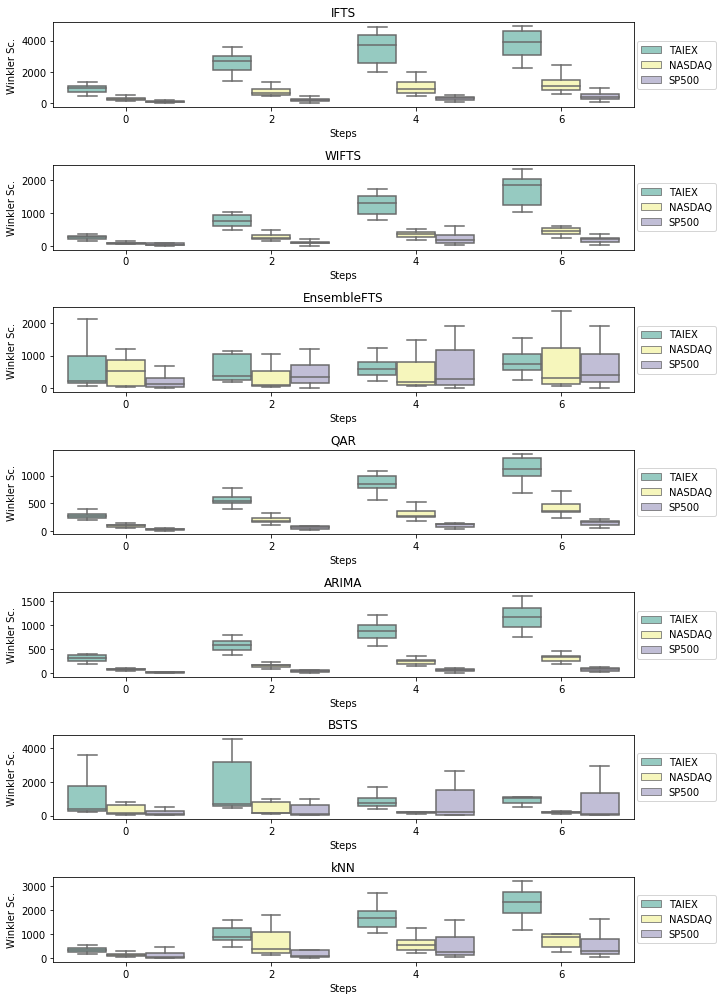

In [0]:

datasets = wk05['Dataset'].unique()
#models = wk05['Model'].unique()

models = ['IFTS','WIFTS','EnsembleFTS-.05',
          'QAR(1)-0.05', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['IFTS','WIFTS','EnsembleFTS','QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])



for cm, model in enumerate(models):
  #for cd, dataset in enumerate(datasets):
    df = wk05[(wk05['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax[cm], 
                 palette="Set3")
    ax[cm].set_ylabel("Winkler Sc.")
    ax[cm].set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

### Probabilistic

#### Batch experiment execution

In [0]:
methods = [arima.ARIMA, quantreg.QuantileRegression, BSTS.ARIMA, knn.KNearestNeighbors]

methods_parameters = [
    {'order':(1,0,0)},
    {'order':(1,0,1)},
    {'order':(2,0,0)},
    {'order':1, 'dist': True},
    {'order':2, 'dist': True},
    {'order':(1,0,0)},
    {'order':(1,0,1)},
    {'order':(2,0,0)},
    {'order':1 },
    {'order':2 }
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=methods,
                                     benchmark_methods_parameters=methods_parameters,
                                     methods=[],
                                     methods_parameters=[{},{}],
                                     transformations=[None],
                                     orders=[],
                                     steps_ahead=[10],
                                     partitions=[],
                                     type='distribution',
                                     distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                     file="experiments.db", dataset=dataset_name, tag="experiments")

#### Result Table

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "crps", "Steps = 0 and Value < 5000")
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.05':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

tests
#print(tests.to_latex())

,dataset,QAR,kNN,ARIMA,EnsembleFTS,BSTS
0,NASDAQ,1.028,1.158,1.444,1.923,3.208
1,TAIEX,1.135,1.229,1.691,1.301,4.081
2,SP500,1.557,4.403,1.216,1.995,3.278


#### Mean Equality Test

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests)
#print(ranks.to_latex())
ranks

F-Value: 7.264833574529668 	p-Value: 0.12253751253946543

H0 is accepted!



,METHOD,RANK
0,QAR,3.000000
2,ARIMA,6.666667
1,kNN,8.333333
3,EnsembleFTS,8.666667
4,BSTS,13.333333


#### Post Hoc Tests

In [0]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'EnsembleFTS')

#print(tests.to_latex())
tests

,COMPARISON,Z-VALUE,P-VALUE,ADJUSTED P-VALUE,Result
0,EnsembleFTS vs QAR,1.551881,0.120691,0.402185,H0 Accepted
1,EnsembleFTS vs BSTS,1.278019,0.201243,0.402185,H0 Accepted
2,EnsembleFTS vs ARIMA,0.547723,0.583882,0.689338,H0 Accepted
3,EnsembleFTS vs kNN,0.091287,0.927264,0.927264,H0 Accepted


#### Many Steps Ahead Accuracy

In [0]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
" measure = 'crps' and Value < 5000"

crps = bUtil.get_dataframe_from_bd("experiments.db", sql)

crps.head()

,ID,Date,Dataset,Tag,Type,Model,Transformation,Order,Scheme,Partitions,Size,Steps,Method,Measure,Value
0,95637,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,None,0,0,None,crps,4.224
1,95643,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,None,0,2,None,crps,1.237
2,95649,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,None,0,4,None,crps,0.806
3,95655,2019-06-04 17:09:44,TAIEX,experiments,density,"ARIMA(2,0,0)-0.05",,NaN,,None,0,6,None,crps,1.648
4,95667,2019-06-04 17:09:44,TAIEX,experiments,density,QAR(2)-0.05,,NaN,,None,0,0,None,crps,4.623


In [0]:
crps['Model'].unique()

array(['ARIMA(2,0,0)-0.05', 'QAR(2)-0.05', 'BSTS(2,0,0)-0.05',
       'kNN(2)-0.05', 'EnsembleFTS', 'ARIMA(1,0,0)-0.05',
       'ARIMA(1,0,1)-0.05', 'QAR(1)-0.05', 'BSTS(1,0,0)-0.05',
       'BSTS(1,0,1)-0.05', 'kNN(1)-0.05'], dtype=object)

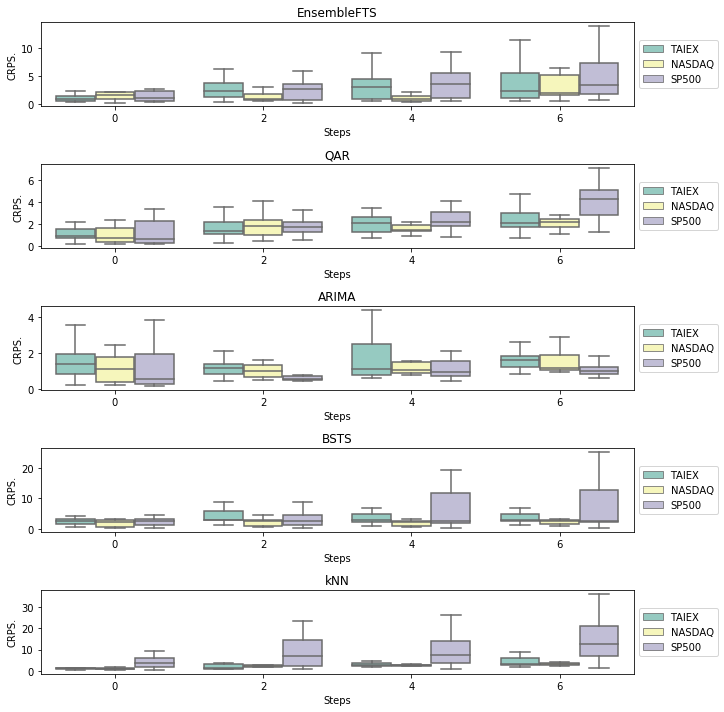

In [0]:

datasets = crps['Dataset'].unique()

models = ['EnsembleFTS',
          'QAR(1)-0.05', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['EnsembleFTS','QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])



for cm, model in enumerate(models):
  #for cd, dataset in enumerate(datasets):
    df = crps[(crps['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax[cm], 
                 palette="Set3")
    ax[cm].set_ylabel("CRPS.")
    ax[cm].set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

## Samples

In [0]:
from pyFTS.data import TAIEX, NASDAQ, SP500
from pyFTS.common import Util

train = TAIEX.get_data()[1000:1800]
test = TAIEX.get_data()[1800:2000]


### [I]FTS

In [0]:
from pyFTS.models import ifts
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=train, npart=45)

model1 = ifts.IntervalFTS(partitioner=fs, order=1)
model1.fit(train)

model2 = ifts.WeightedIntervalFTS(partitioner=fs, order=1)
model2.fit(train)


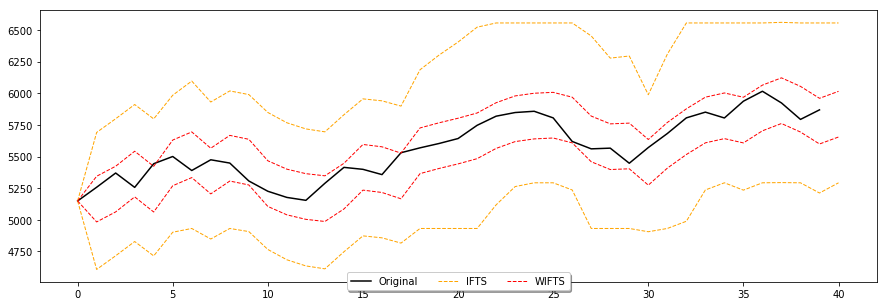

In [0]:
horizon=40

intervals1 = model1.predict(test[:horizon], type='interval')
intervals2 = model2.predict(test[:horizon], type='interval')

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:horizon], label='Original',color='black')
Util.plot_interval2(intervals1, test[:horizon], start_at=model1.order-1, ax=ax, color='orange', ls='--', label='IFTS')
Util.plot_interval2(intervals2, test[:horizon], start_at=model2.order-1, ax=ax, color='red', ls='--', label='WIFTS')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))


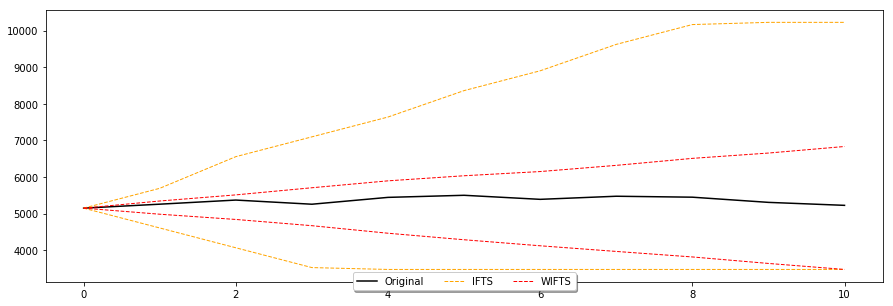

In [0]:
horizon=10

intervals1 = model1.predict(test[:10], type='interval', steps_ahead=horizon)
intervals2 = model2.predict(test[:10], type='interval', steps_ahead=horizon)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:11], label='Original',color='black')
Util.plot_interval2(intervals1, test[:10], start_at=model1.order-1, ax=ax, color='orange', ls='--', label='IFTS')
Util.plot_interval2(intervals2, test[:10], start_at=model2.order-1, ax=ax, color='red', ls='--', label='WIFTS')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))


### EnsembleFTS

In [0]:
from pyFTS.models import hofts

model = ensemble.SimpleEnsembleFTS(
    fts_method=hofts.WeightedHighOrderFTS, 
    orders=[1, 2, 3], 
    partitions=np.arange(35,55,5)
)

model.fit(train)



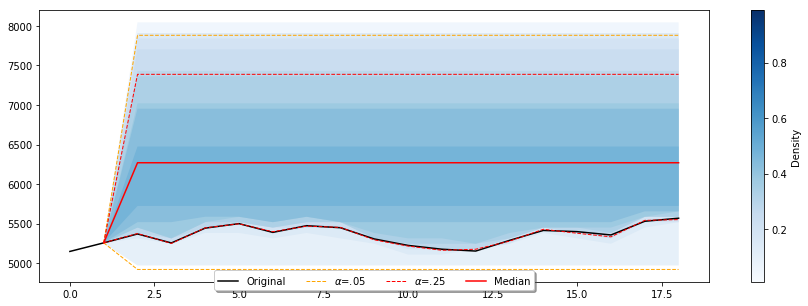

In [0]:
horizon=20

intervals05 = model.predict(test[:horizon], type='interval', alpha=.05)
intervals25 = model.predict(test[:horizon], type='interval', alpha=.25)
distributions = model.predict(test[:horizon], type='distribution', smooth='histogram', num_bins=100)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:horizon-1], label='Original',color='black')
Util.plot_interval2(intervals05[:-1], test[:horizon], start_at=model.order-2, ax=ax, color='orange', ls='--', label='$\\alpha$=.05'.format(model.order))
Util.plot_interval2(intervals25[:-1], test[:horizon], start_at=model.order-2, ax=ax, color='red', ls='--', label='$\\alpha$=.25'.format(model.order))
Util.plot_distribution2(distributions, test[:10], start_at=model.order-2, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

In [0]:
horizon=6

intervals05 = model.predict(test[:10], type='interval', alpha=.05, steps_ahead=horizon)
intervals25 = model.predict(test[:10], type='interval', alpha=.25, steps_ahead=horizon)
distributions = model.predict(test[:10], type='distribution', smooth='histogram', steps_ahead=horizon, num_bins=100)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:10], label='Original',color='black')
Util.plot_interval2(intervals05, test[:10], start_at=model.order, ax=ax, color='orange', ls='--', label='$\\alpha$=.05'.format(model.order))
Util.plot_interval2(intervals25, test[:10], start_at=model.order, ax=ax, color='red', ls='--', label='$\\alpha$=.25'.format(model.order))
Util.plot_distribution2(distributions, test[:10], start_at=model.order, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

KeyboardInterrupt: ignored

### ARIMA

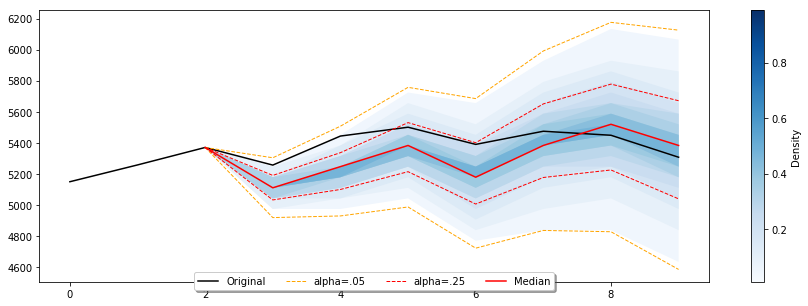

In [0]:
model = arima.ARIMA(order = (2,0,0))
model.fit(train)

horizon=7

points  = model.predict(test[:10], type='point', steps_ahead=horizon)
intervals05 = model.predict(test[:10], type='interval', alpha=.05, steps_ahead=horizon)
intervals25 = model.predict(test[:10], type='interval', alpha=.25, steps_ahead=horizon)
distributions = model.predict(test[:10], type='distribution', steps_ahead=horizon, num_bins=100)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(test[:10], label='Original',color='black')
Util.plot_interval2(intervals05, test[:10], start_at=model.order, ax=ax, color='orange', ls='--', label='$\\alpha$=.05'.format(model.order))
Util.plot_interval2(intervals25, test[:10], start_at=model.order, ax=ax, color='red', ls='--', label='$\\alpha$=.25'.format(model.order))
Util.plot_distribution2(distributions, test[:10], start_at=2, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

### Quantile Regression

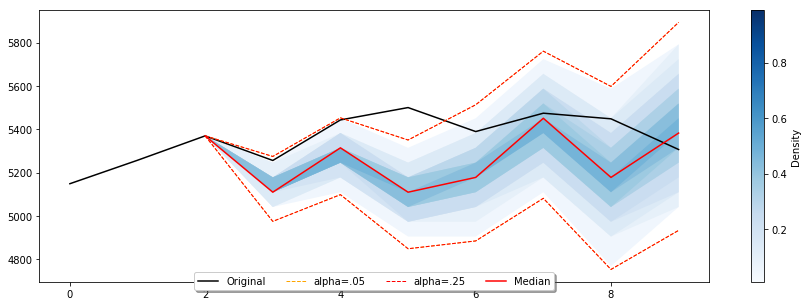

In [0]:
order = 2
model = quantreg.QuantileRegression(order=order, dist=True)
model.fit(train)

horizon=7

intervals05 = model.predict(test[:10], type='interval', alpha=.05, smoothing=0.01, steps_ahead=horizon)
intervals25 = model.predict(test[:10], type='interval', alpha=.25, smoothing=0.01, steps_ahead=horizon)
distributions = model.predict(test[:10], type='distribution', steps_ahead=horizon, smoothing=0.01, num_bins=100)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(test[:10], label='Original',color='black')
Util.plot_interval2(intervals05, test[:10], start_at=model.order, ax=ax, color='orange', ls='--', label='$\\alpha$=.05'.format(model.order))
Util.plot_interval2(intervals25, test[:10], start_at=model.order, ax=ax, color='red', ls='--', label='$\\alpha$=.25'.format(model.order))
Util.plot_distribution2(distributions, test[:10], start_at=model.order, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

### Bayesian Structural Time Series

Acceptance rate of Metropolis-Hastings is 0.002025
Acceptance rate of Metropolis-Hastings is 0.021725
Acceptance rate of Metropolis-Hastings is 0.113075
Acceptance rate of Metropolis-Hastings is 0.143425
Acceptance rate of Metropolis-Hastings is 0.186725
Acceptance rate of Metropolis-Hastings is 0.24835

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.1243625
Acceptance rate of Metropolis-Hastings is 0.32485


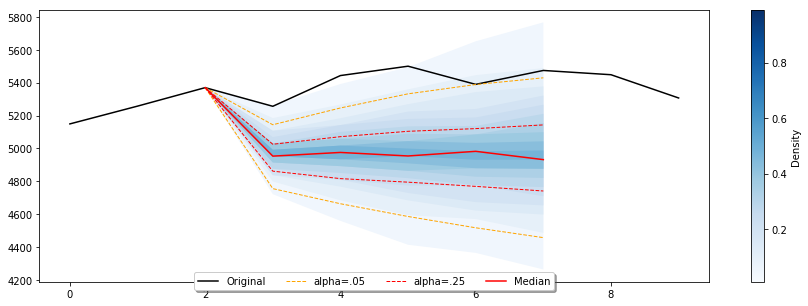

In [0]:
model = BSTS.ARIMA(order=(2,0,0))
model.train(train)

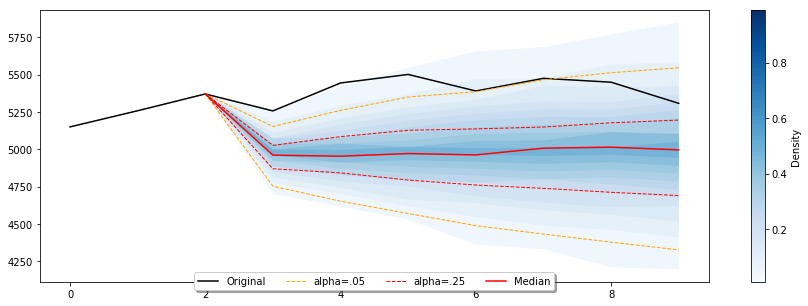

In [0]:
horizon=7
intervals05 = model.predict(test[:10], type='interval', alpha=.05, smoothing=0.01, steps_ahead=horizon)
intervals25 = model.predict(test[:10], type='interval', alpha=.25, smoothing=0.01, steps_ahead=horizon)
distributions = model.predict(test[:10], type='distribution', steps_ahead=horizon, smoothing=0.01, num_bins=100)


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(test[:10], label='Original',color='black')
Util.plot_interval2(intervals05, test[:10], start_at=model.order, ax=ax, color='orange', ls='--', label='$\\alpha$=.05'.format(model.order))
Util.plot_interval2(intervals25, test[:10], start_at=model.order, ax=ax, color='red', ls='--', label='$\\alpha$=.25'.format(model.order))
Util.plot_distribution2(distributions, test[:10], start_at=model.order, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

### k-NN + KDE

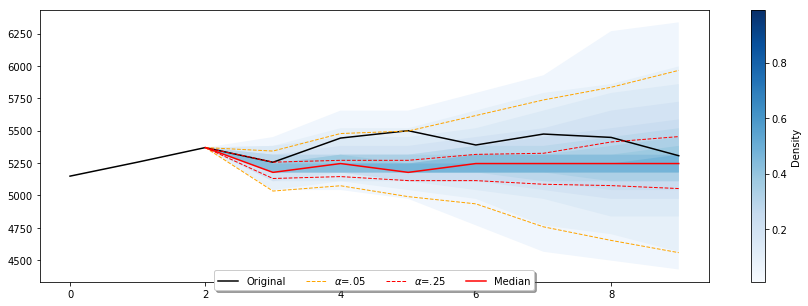

In [0]:
from pyFTS.benchmarks import knn

order=2
model = knn.KNearestNeighbors(order=order)
model.fit(train)

horizon=7

intervals05 = model.predict(test[:10], type='interval', alpha=.05, steps_ahead=horizon)
intervals25 = model.predict(test[:10], type='interval', alpha=.25, steps_ahead=horizon)
distributions = model.predict(test[:10], type='distribution', steps_ahead=horizon, smoothing=0.01, num_bins=100)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:10], label='Original',color='black')
Util.plot_interval2(intervals05, test[:10], start_at=model.order, ax=ax, color='orange', ls='--', label='$\\alpha$=.05'.format(model.order))
Util.plot_interval2(intervals25, test[:10], start_at=model.order, ax=ax, color='red', ls='--', label='$\\alpha$=.25'.format(model.order))
Util.plot_distribution2(distributions, test[:10], start_at=model.order, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))


In [0]:
import sklearn
sklearn.__version__

'0.21.2'